<a href="https://colab.research.google.com/github/Suresh-kg/oasis/blob/main/oasis_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# prompt:  convert categorical data

# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data
label_encoded_df = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoded_df[col] = label_encoder.fit_transform(label_encoded_df[col])

label_encoded_df.head()

Categorical variables:
['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,12328,2787,4989,1,108,40.64749,-73.97237,1,149,1,9,1501,0.21,6,365
1,2595,37455,2845,4785,2,127,40.75362,-73.98377,0,225,1,45,1715,0.38,2,355
2,3647,43543,4632,2909,2,94,40.80902,-73.94190,1,150,3,0,1764,NaN,1,365
3,3831,14783,4869,6203,1,41,40.68514,-73.95976,0,89,1,270,1760,4.64,1,194
4,5022,18693,7192,5923,2,61,40.79851,-73.94399,0,80,10,9,1532,0.10,1,0


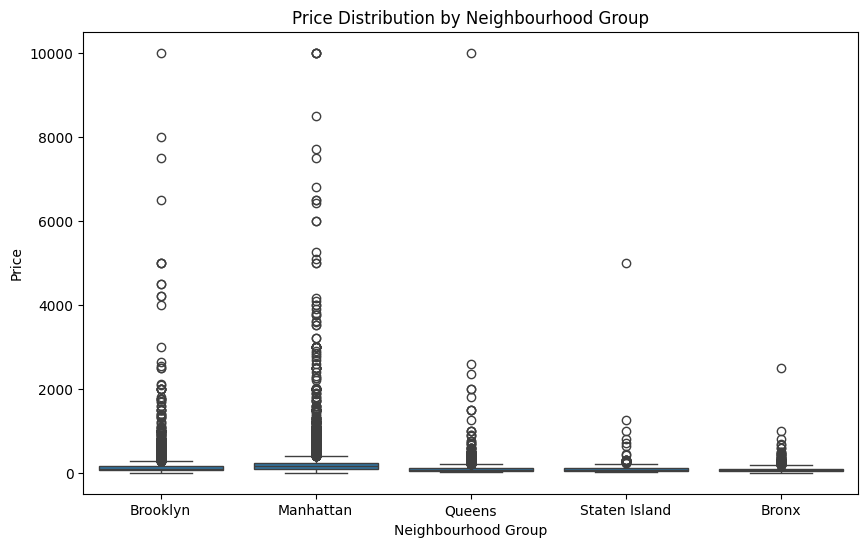

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

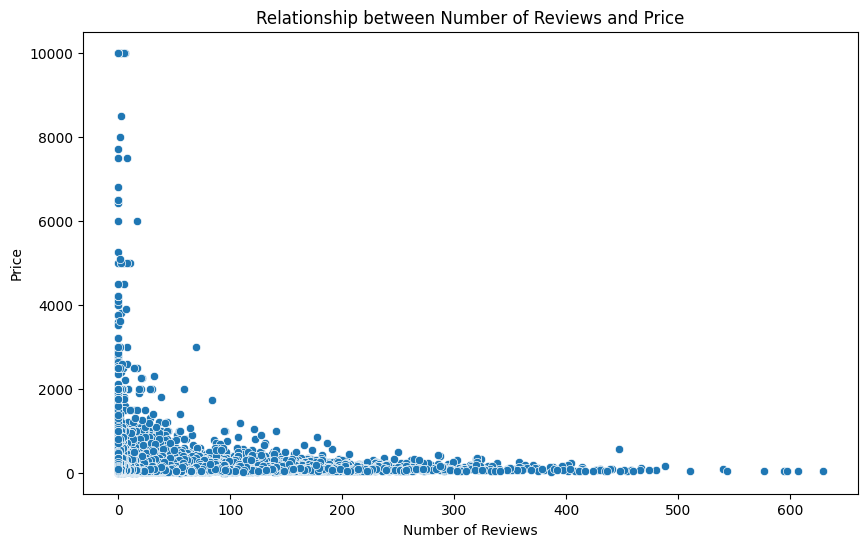

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title("Relationship between Number of Reviews and Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

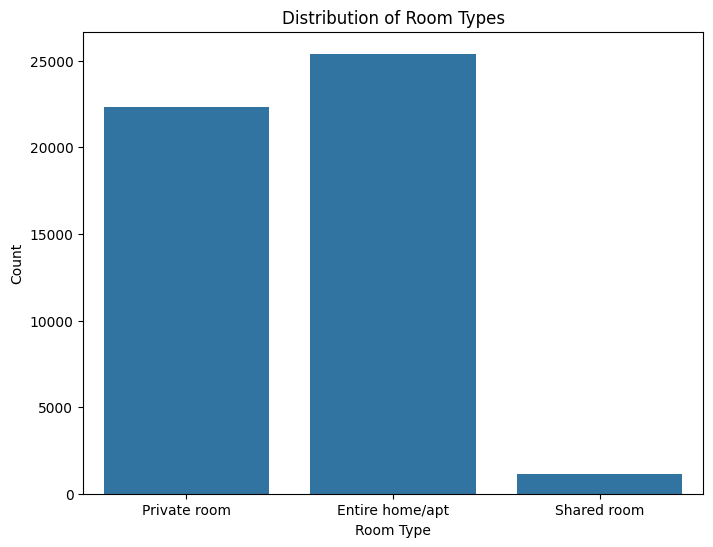

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

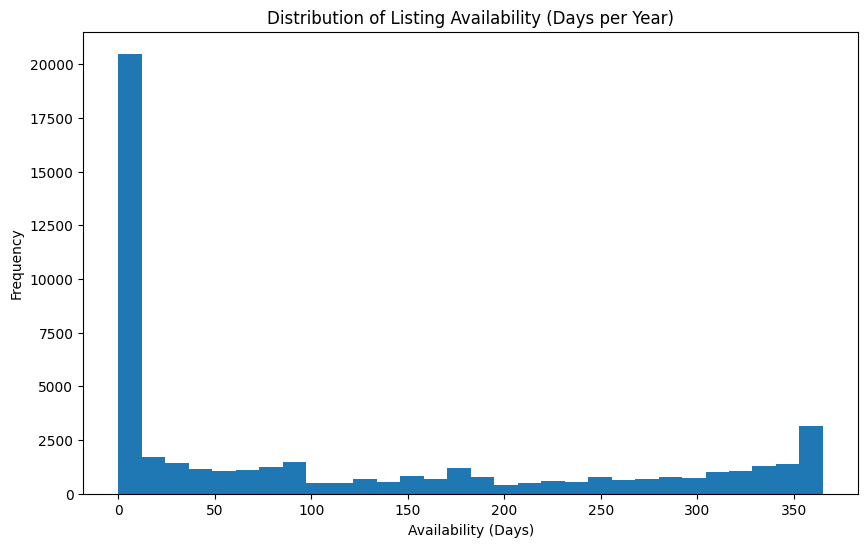

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30)
plt.title("Distribution of Listing Availability (Days per Year)")
plt.xlabel("Availability (Days)")
plt.ylabel("Frequency")
plt.show()

## Add Heatmap

### Subtask:
Create a heatmap of the correlation matrix of the numerical features.

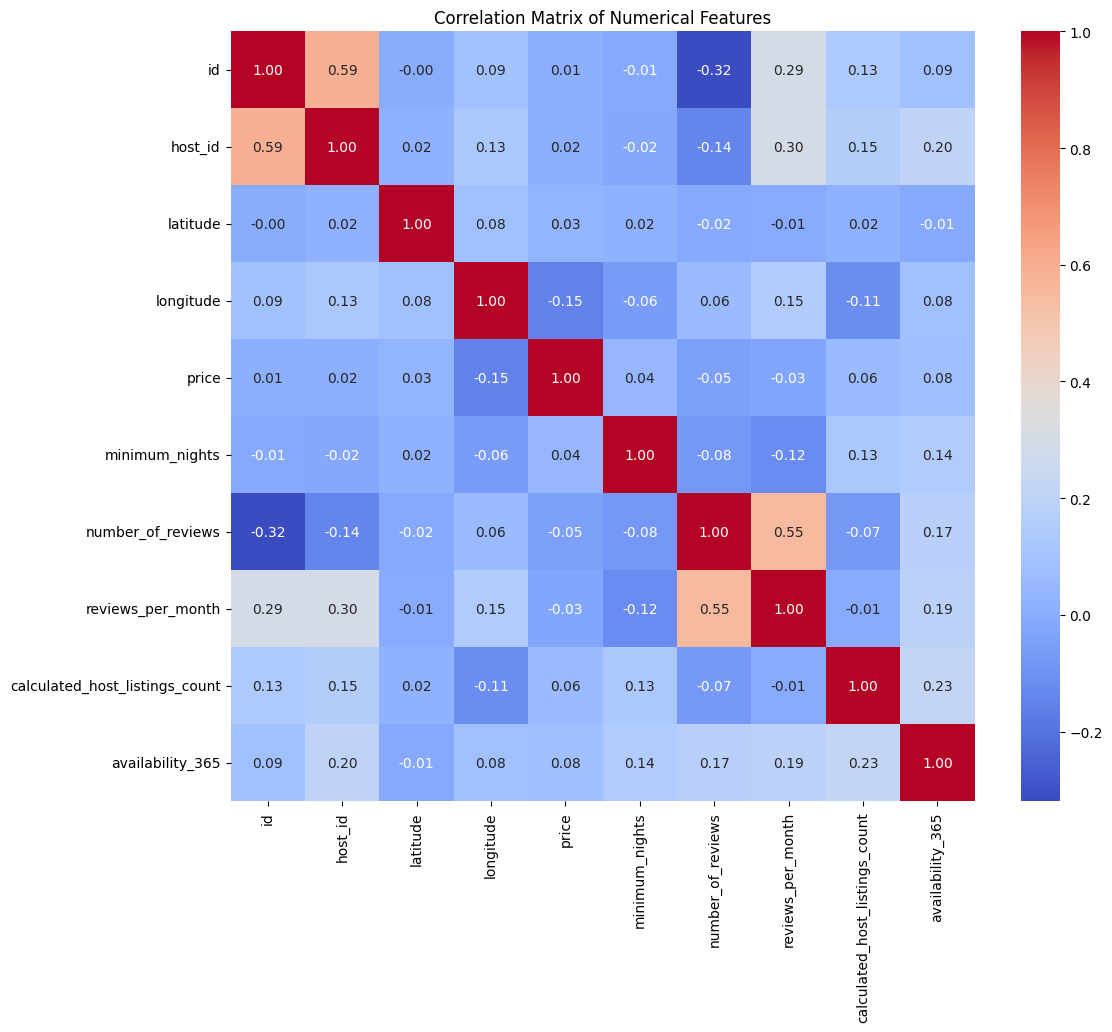

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()